# Проект: Исследовательский анализ данных по Яндекс.Недвижимости

Для анализа я взяла данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

## Задача:
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 
Данные были получены в виде датасета.

## Общий вывод:
В ходе исследования я выявила, что на недвижимость в Питере влияют следующие факторы:

- площадь квартиры (сюда входит жилая площадь и площадь кухни);
- количество комнат (естественно, что студия будет дешевле, чем 3-х комнатная квартира);
- район, в котором находится квартира (центр Питера ожидаемо самый дорогой);
- этаж, где находится квартира (первые этажи - самые дешевые, последние чуть дороже, а остальные варианты самые дорогие).

Соответственно, чем ближе к центру, больше метраж и количество комнат, ну и скажем 5 этаж из 10, то это будет стоить дороже, чем студия на окраине города, на 1 этаже.

## Шаг 1. Откройте файл с данными и изучите общую информацию
#### Шаг 1. Импортируем библиотеки и открываем файл.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

#### Шаг 2. Изучаем общую информацию о полученном датафрейме.

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем основную информацию с помощью метода инфо.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Шаг 3. Построим гистограмму.

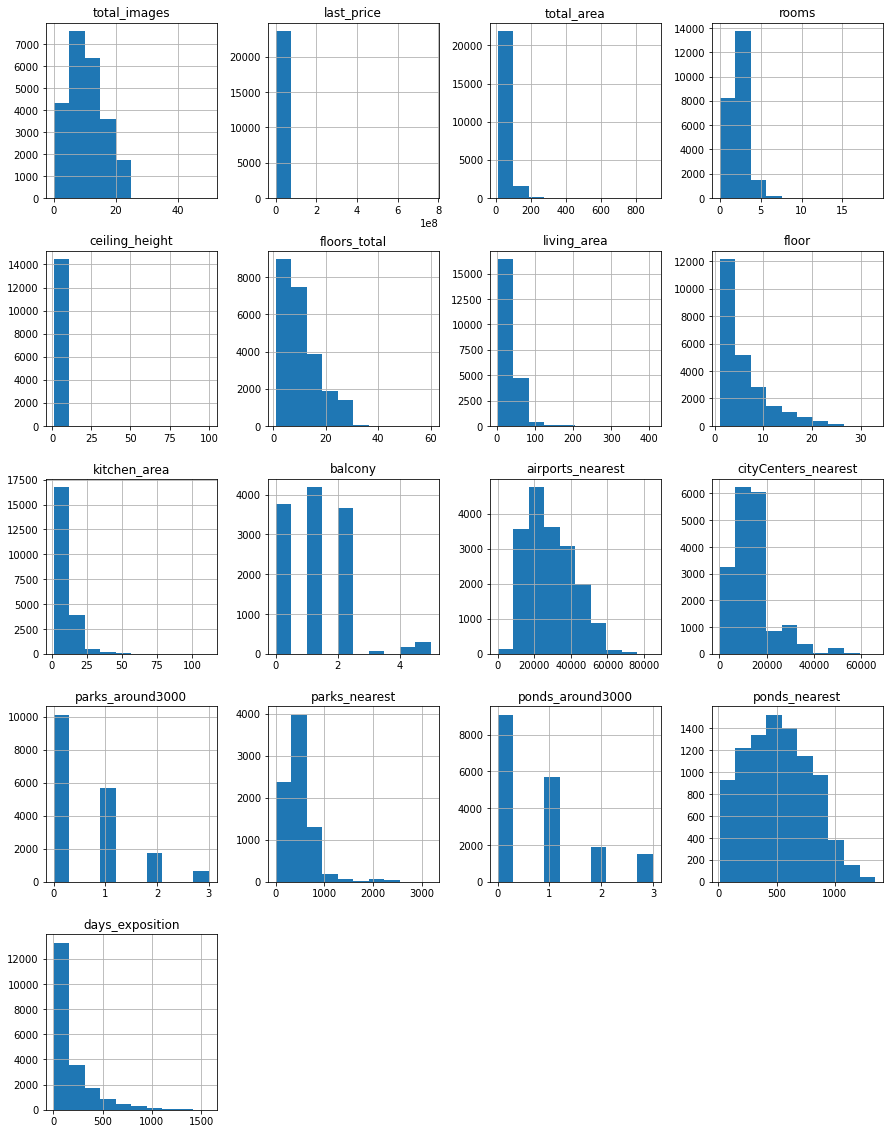

In [4]:
data.hist(figsize=(15, 20));

## 2. Предобработка данных
#### Шаг 1. Найдем в каких столбцах встречаются пропуски.


In [5]:
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


#### Получилось 14 столбцов с пропусками.

ceiling_height  - высота потолков. Изменим на медианные значения.

floors_total - всего этажей в доме. Не будем заполнять их и оставим значения пропущенными.

living_area - жилая площадь в квадратных метрах. Посмотрим, как в среднем соотносятся жилая площадь и общая, и после этого для пропусков умножим общую площадь на этот коэффициент - получится примерное значение жилой площади для этой квартиры. 

is_apartment - апартаменты. Скорее всего, если человек пропустил это значение, то данное жилье не является аппартаментами. Поэтому заменим все пропуски на False.

kitchen_area - площадь кухни. Посмотрим, как в среднем соотносятся площадь кухни и общая, и после этого для пропусков умножим общую площадь на этот коэффициент - получится примерное значение площади кухни для этой квартиры.

balcony - наличие балконов. Скорее всего, если их не отметили, то их нет. Поэтому заменим пропуски на 0.

locality_name - название населённого пункта. Оставим без изменений.

airports_nearest - расстояние до ближайшего аэропорта в метрах (м). Оставим пропуски без изменений, так как нет возможности корректно заменить данные.

cityCenters_nearest - расстояние до центра города (м). Оставим пропуски без изменений, так как нет возможности корректно заменить данные.

parks_around3000 - расстояние до ближайшего парка (м). Оставим пропуски без изменений, так как нет возможности корректно заменить данные.

parks_nearest - число парков в радиусе 3 км. Если здесь пропуск, то скорее всего рядом нет парков, поэтому ставим 0 вместо пропущенных значений.

ponds_around3000 - число водоёмов в радиусе 3 км. Если здесь пропуск, то скорее всего рядом нет водоемов, поэтому ставим 0 вместо пропущенных значений.

ponds_nearest - расстояние до ближайшего водоёма (м). Оставим пропуски без изменений, так как нет возможности корректно заменить данные.

days_exposition - сколько дней было размещено объявление (от публикации до снятия). Оставим пропуски без изменений, так как нет возможности корректно заменить данные.

##### Заполним пропущенные значения.

In [9]:
# меняем пропуски в "is_apartment" на False
data['is_apartment'].fillna(value=False, inplace=True)

# меняем пропуски в "balcony" на 0
data['balcony'].fillna(value=0, inplace=True)

# меняем пропуски в "parks_nearest" на 0
data['parks_nearest'].fillna(value=0, inplace=True)

# меняем пропуски в "parks_nearest" на 0
data['ponds_around3000'].fillna(value=0, inplace=True)

#проверим, все ли измененные пропуски исчезли
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


Поменяем пропуски "ceiling_height" на медиану.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


Займемся столбцом 'kitchen_area'. Делим среднюю площадь кухни на среднюю общую площадь и умножаем полученный коэффициент на общую площадь.

In [11]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
print(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


Займемся столбцом 'living_area'. Делим среднюю жилую площадь  на среднюю общую площадь и умножаем полученный коэффициент на общую площадь.

Почему могли возникнуть пропуски?
- технический сбой
- человеческий фактор (забыли, решили не указывать данные, не заметили т.д.)

#### Шаг 2. Займемся типами данных.
Посмотрим, что за типы данных есть в таблице сейчас и нужно ли что-то изменить.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Столбец "first_day_exposition" имеет неверный тип данных, так как дата публикации должна быть в формате datetime.



In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

data['balcony'] = data['balcony'].astype(int)

# устанавливаем маркер 9999 для пропусков и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

data['last_price'] = data['last_price'].astype(int)

# устанавливаем маркер 9999 для пропусков и приводим к целочисленному типу
data['parks_around3000'].fillna(0, inplace=True)
data['parks_around3000'] = data['parks_around3000'].astype(int)

data['ponds_around3000'] = data['ponds_around3000'].astype(int) 

#проверяем получилось ли изменить тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

На мой взгляд остальные столбцы не нуждаются в смене типа данных, поэтому переходим к следующему шагу.

#### Шаг 3. Изучите данные  в столбце с названиями и устраните неявные дубликаты.

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В основном тут повторяются такие слова, как "поселок" и "посёлок", "городской" и "городского типа", и т.д. Поменяем их используя метод replace()


In [16]:
# приведем все к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

# заменяем такие слова, как "поселок" и "посёлок"
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')

# заменяем такие слова, как "городской" и "городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской', 'городского типа')

Теперь проверим на количество явных дубликатов.


In [17]:
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


Явных дубликатов нет, значит можно переходить к следующему заданию.

 #### Шаг 4. Устраним аномальные значения.
 Выведем на экран таблицу и посмотрим есть ли выбросы на первый взгляд.

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,23699.000000,23699.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.638719,34.594076,5.892358,10.506288,0.591080,28793.672193,14191.277833,0.469049,167.315499,0.590911,517.980900,1498.725347
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.610834,22.354668,4.885249,6.040000,0.959298,12630.880622,8608.386210,0.748534,306.709997,0.883999,277.720643,3353.244157
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,0.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,0.000000,0.000000,502.000000,124.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,301.000000,1.000000,729.000000,390.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,9999.000000


Какие колонки зрительно имеют выбросы?

total_area - максимальная площадь 900? Выглядит подозрительно. Возможно, что это элитная недвижимость. А минимальная площадь начинается с 12.

rooms - максимальное значение комнат 19. Тоже может быть выпадом. Поэтому нужно перепроведить данную информацию. А минимальное количество комнат - 0. Может быть это студия или апартаменты. Надо посмотреть.

ceiling_height - высота потолков. Здесь значение не должно быть больше 5 метров. Аномалии убираем.

floors_total - всего этажей в доме. Максимальное значение 60. Тоже выглядит подозрительно. Данную информацию необходимо проверить.

living_area - жилая площадь в квадратных метрах. Максимальный показатель в 409 тоже выглядит подозрительно. Подозреваю, что это аномалии. А минимальный показатель вообще 2 метра. Это что за жилая площадь такая? Будем проверять и убирать.

Отдельно проверим каждый столбец и поработаем с ними.

Для анализа аномальных значений возьмем столбец "total_area". Там слишком большой разброс квадратных метров, от 12 до 900. Предлагаю разбить его на 2 части: длят обычной и элитной недвижимости. Пусть элитная недвижимость будет больше 100 квадратных метров. А до 100 обычная.

In [19]:
print('Квартир площадью менее 10 кв.м.:',data.query('total_area < 10')['total_area'].count()) 
print('Квартир площадью более 100 кв.м.:',data.query('total_area > 100')['total_area'].count())

Квартир площадью менее 10 кв.м.: 0
Квартир площадью более 100 кв.м.: 1836


Получается, что нет сильно маленьких квартир, а вот элитная недвижимость занимает весомую часть. Поэтому исключать эти данные, как я планировала ранее не буду.

##### rooms

Займемся комнатами. В таблице видно значения комнат от 0 до 19. 19 комнат скорее всего относятся к элитному жилью, но 0 комнат быть не может. Поэтому проверим, вдруг 0 комнат - это студиии или аппартаменты.

In [20]:
print('Количество квартир без комнат:', data.query('rooms == 0')['rooms'].count())
print('Количество квартир без комнат:', data.query('rooms == 0 and studio')['rooms'].count())
print('Эти квартиры отмечены, как студии')
print(' ')
print('Количество квартир без комнат:', data.query('rooms == 0 and is_apartment')['rooms'].count())  
print('Эти квартиры отмечены, как апартаменты')
print(' ')
print('Количество квартир без комнат:', data.query('rooms == 0 and open_plan')['rooms'].count())  
print('Эти квартиры отмечены, как жилье со свободной планировкой')
print(' ')
print('Итого, сумма квартир студий и со свободной планировкой:', (data.query('rooms == 0 and studio')['rooms'].count())+ (data.query('rooms == 0 and open_plan')['rooms'].count()))

print('Количество квартир с одной комнатой:', data.query('rooms == 1')['rooms'].count())
print('Количество квартир с двумя комнатами:', data.query('rooms == 2')['rooms'].count())
print('Количество квартир с тремя комнатами:', data.query('rooms == 3')['rooms'].count())
print('Количество квартир с четырьмя комнатами:', data.query('rooms == 4')['rooms'].count())
print('Количество квартир с 5-7 комнатами:', data.query('rooms >= 5 and rooms <= 7')['rooms'].count())
print('Количество квартир с 8-10 комнатами:', data.query('rooms >= 8 and rooms <= 10')['rooms'].count())
print('Количество квартир с 10-15 комнатами:', data.query('rooms >= 10 and rooms <= 15')['rooms'].count())
print('Количество квартир с 15-19 комнатами:', data.query('rooms >= 15 and rooms <= 19')['rooms'].count())

Количество квартир без комнат: 197
Количество квартир без комнат: 138
Эти квартиры отмечены, как студии
 
Количество квартир без комнат: 0
Эти квартиры отмечены, как апартаменты
 
Количество квартир без комнат: 59
Эти квартиры отмечены, как жилье со свободной планировкой
 
Итого, сумма квартир студий и со свободной планировкой: 197
Количество квартир с одной комнатой: 8047
Количество квартир с двумя комнатами: 7940
Количество квартир с тремя комнатами: 5814
Количество квартир с четырьмя комнатами: 1180
Количество квартир с 5-7 комнатами: 490
Количество квартир с 8-10 комнатами: 23
Количество квартир с 10-15 комнатами: 9
Количество квартир с 15-19 комнатами: 3


Уберем данные о квартирах с 8-19 комнатами, так как они занимают меньше 2% от данных и не влияют на исследование.

In [21]:
data['rooms'] = data.query('rooms <= 7')['rooms']
print('Количество квартир до 7 комнат:', data.query('rooms <= 7')['rooms'].count())
print('Количество квартир с 8-10 комнатами:', data.query('rooms >= 8 and rooms <= 10')['rooms'].count())
print('Количество квартир с 10-15 комнатами:', data.query('rooms >= 10 and rooms <= 15')['rooms'].count())
print('Количество квартир с 15-19 комнатами:', data.query('rooms >= 15 and rooms <= 19')['rooms'].count())

Количество квартир до 7 комнат: 23668
Количество квартир с 8-10 комнатами: 0
Количество квартир с 10-15 комнатами: 0
Количество квартир с 15-19 комнатами: 0


##### ceiling_height 

Высота потолков. Здесь значение не должно быть больше 5 метров. Аномалии убираем.


In [22]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Убираем выбросы c помощью метода query(). Но перед этим нужно убрать nan из списка.


In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

data = data.query('ceiling_height < 5')

In [24]:
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62,
       3.12, 2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54,
       3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 ,
       3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36,
       3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14,
       4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32,
       1.2 , 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02,
       3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51,
       3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 1.

Получилось убрать все аномальные значения из столбца 'ceiling_height'.

##### floors_total
Займемся показателем floors_total - всего этажей в доме. 

In [25]:
print('Количество квартир из домов до 5 этажей:', data.query('floors_total <= 5')['floors_total'].count()) 
print('Количество квартир из домов на 6-10 этажей:', data.query('floors_total >= 6 and floors_total <= 10')['floors_total'].count())
print('Количество квартир из домов на 11-20 этажей:', data.query('floors_total >= 11 and floors_total <= 20')['floors_total'].count())
print('Количество квартир из домов на 21-30 этажей:', data.query('floors_total >= 21 and floors_total <= 30')['floors_total'].count())
print('Количество квартир из домов на 31-40 этажей:', data.query('floors_total >= 31 and floors_total <= 40')['floors_total'].count())
print('Количество квартир из домов на 41-50 этажей:', data.query('floors_total >= 41 and floors_total <= 50')['floors_total'].count())
print('Количество квартир из домов на 51-60 этажей:', data.query('floors_total >= 51 and floors_total <= 60')['floors_total'].count())

Количество квартир из домов до 5 этажей: 8129
Количество квартир из домов на 6-10 этажей: 6824
Количество квартир из домов на 11-20 этажей: 6030
Количество квартир из домов на 21-30 этажей: 2648
Количество квартир из домов на 31-40 этажей: 29
Количество квартир из домов на 41-50 этажей: 0
Количество квартир из домов на 51-60 этажей: 2


Итого получается, что большинство квартир сосредоточены в домах до 30 этажей. Домов в диапазоне от 21 до 30 этажей всего 27. Это меньше, чем 2%. Поэтому такие данные мы будем удалять. Также домов на 51-60 этажей всего 2. Поэтому такие значения мы тоже удалим, как ничтожно малые.

In [26]:
data = data[(data['floors_total'] != 31) & (data['floors_total'] != 32) 
          & (data['floors_total'] != 33) & (data['floors_total'] != 34) 
          & (data['floors_total'] != 35) & (data['floors_total'] != 36)
          & (data['floors_total'] != 37) & (data['floors_total'] != 38)
          & (data['floors_total'] != 39) & (data['floors_total'] != 40)]
          

data = data[(data['floors_total'] != 51) & (data['floors_total'] != 52) 
          & (data['floors_total'] != 53) & (data['floors_total'] != 54) 
          & (data['floors_total'] != 55) & (data['floors_total'] != 56)
          & (data['floors_total'] != 57) & (data['floors_total'] != 58)
          & (data['floors_total'] != 59) & (data['floors_total'] != 60)]

print('Количество квартир из домов до 5 этажей:', data.query('floors_total <= 5')['floors_total'].count()) 
print('Количество квартир из домов на 6-10 этажей:', data.query('floors_total >= 6 and floors_total <= 10')['floors_total'].count())
print('Количество квартир из домов на 11-20 этажей:', data.query('floors_total >= 11 and floors_total <= 20')['floors_total'].count())
print('Количество квартир из домов на 21-30 этажей:', data.query('floors_total >= 21 and floors_total <= 30')['floors_total'].count())
print('Количество квартир из домов на 31-40 этажей:', data.query('floors_total >= 31 and floors_total <= 40')['floors_total'].count())
print('Количество квартир из домов на 41-50 этажей:', data.query('floors_total >= 41 and floors_total <= 50')['floors_total'].count())
print('Количество квартир из домов на 51-60 этажей:', data.query('floors_total >= 51 and floors_total <= 60')['floors_total'].count())

Количество квартир из домов до 5 этажей: 8129
Количество квартир из домов на 6-10 этажей: 6824
Количество квартир из домов на 11-20 этажей: 6030
Количество квартир из домов на 21-30 этажей: 2648
Количество квартир из домов на 31-40 этажей: 0
Количество квартир из домов на 41-50 этажей: 0
Количество квартир из домов на 51-60 этажей: 0


##### living_area - жилая площадь в квадратных метрах.

Посмотрим, как распределяется жилая площадь и в какой категории больше всего квартир. Предварительно минимальная площадь 2 квадратных метра выглядит подозрительно. Возможно, просто опечатались и написали 2 м вместо 20 м.

А максимальное значение в 409 квадратныхметров, которое вначале показалось выбросом, теперь я отнесла к элитному жилью, которое тоже вошло в датасет.

Поэтому сосредоточимся на маленьких значениях жилой площади до 10 квадратных метров.

In [27]:
print('Количество квартир с жилой площадью 2 квадратных метра:', data.query('living_area <= 2')['living_area'].count()) 
print('Количество квартир с жилой площадью 3 квадратных метра:', data.query('living_area <= 3')['living_area'].count()) 
print('Количество квартир с жилой площадью 4 квадратных метра:', data.query('living_area <= 4')['living_area'].count())
print('Количество квартир с жилой площадью 5 квадратных метр:', data.query('living_area <= 5')['living_area'].count())
print('Количество квартир с жилой площадью 6 квадратных метра:', data.query('living_area <= 6')['living_area'].count())
print('Количество квартир с жилой площадью 7 квадратных метра:', data.query('living_area <= 7')['living_area'].count())
print('Количество квартир с жилой площадью 8 квадратных метра:', data.query('living_area <= 8')['living_area'].count())
print('Количество квартир с жилой площадью 9 квадратных метра:', data.query('living_area <= 9')['living_area'].count())
print('Количество квартир с жилой площадью 10 квадратных метра:', data.query('living_area <= 10')['living_area'].count())

Количество квартир с жилой площадью 2 квадратных метра: 2
Количество квартир с жилой площадью 3 квадратных метра: 4
Количество квартир с жилой площадью 4 квадратных метра: 4
Количество квартир с жилой площадью 5 квадратных метр: 5
Количество квартир с жилой площадью 6 квадратных метра: 7
Количество квартир с жилой площадью 7 квадратных метра: 8
Количество квартир с жилой площадью 8 квадратных метра: 13
Количество квартир с жилой площадью 9 квадратных метра: 28
Количество квартир с жилой площадью 10 квадратных метра: 64


Получается, что у нас всего 58 квартир жилой площадью до 10 квадратных метров. Мы можем убрать их из выборки, потому что они не влияют на исследования, так как занимают меньше 2%.

In [28]:
data.drop(index=data.query('living_area <= 10').index,inplace=True)
print('Количество квартир с жилой площадью 10 квадратных метра:', data.query('living_area <= 10')['living_area'].count())

Количество квартир с жилой площадью 10 квадратных метра: 0


#### Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:

Стоимость одного квадратного метра. Для этого создадим столбец с названием "cost_1_square_meter". Его мы рассчитаем поделив стоимость квартиры на количество квадратных метров.

In [29]:
data['cost_1_sqmeter'] = data['last_price']/data['living_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1_sqmeter
0,20,13000000,108.0,2019-03-07,3.0,2.70,16.0,51.000000,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,9999,254901.960784
1,7,3350000,40.4,2018-12-04,1.0,2.65,11.0,18.600000,1,False,...,2,поселок шушары,12817.0,18603.0,0,0.0,0,NaN,81,180107.526882
2,10,5196000,56.0,2015-08-20,2.0,2.65,5.0,34.300000,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,151486.880466
3,0,64900000,159.0,2015-07-24,3.0,2.65,14.0,90.785766,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,714869.770085
4,2,10000000,100.0,2018-06-19,2.0,3.03,14.0,32.000000,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,312500.000000


Вывели таблицу на экран и увидели, что добавился новый столбец в конце. Значит все сделали верно.

Добавим новый столбец день недели публикации объявления. Назовем его "dayofweek".

In [30]:
data['dayofweek'] = data['first_day_exposition'].dt.weekday

Создадим новый столбец - месяц публикации объявления.

In [31]:
data['month'] = data['first_day_exposition'].dt.month

Создадим еще одну колонку с годом публикации.

In [32]:
data['year'] = data['first_day_exposition'].dt.year

Создадим еще одну колонку с типом этажа квартиры (значения — «‎первый», «последний», «другой»). Для этого напишем цикл.

In [33]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Создадим столбец 'cityCenters_nearest_km' и посмотрим какие дома находятся рядом с центром города.

In [34]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

# проверим все ли новые колонки добавились в нашу таблицу
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_1_sqmeter,dayofweek,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3.0,2.70,16.0,51.000000,8,False,...,482.0,2,755.0,9999,254901.960784,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1.0,2.65,11.0,18.600000,1,False,...,0.0,0,NaN,81,180107.526882,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2.0,2.65,5.0,34.300000,4,False,...,90.0,2,574.0,558,151486.880466,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3.0,2.65,14.0,90.785766,9,False,...,84.0,3,234.0,424,714869.770085,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2.0,3.03,14.0,32.000000,13,False,...,112.0,1,48.0,121,312500.000000,1,6,2018,другой,8.0


Да, все новые столбцы добавлены в датафрейм.

##### Шаг 4. Проведите исследовательский анализ данных:

Изучите следующие параметры объектов:
общая площадь.

Для этого выведем график по столбцу "total_area" и посмотрим на него.

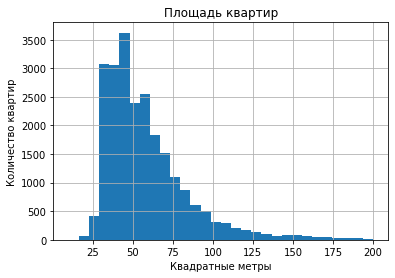

In [35]:
data['total_area'].hist(bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [36]:
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
print('Наименьшие по площади варианты:')
print(data['total_area'].sort_values(ascending=True).head(10))

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64
Наименьшие по площади варианты:
19642    14.00
9412     16.00
10208    17.00
716      17.00
9157     17.60
21802    17.78
12996    18.00
20714    18.00
6084     18.00
8729     18.40
Name: total_area, dtype: float64


Согласно графику больше всего люди продают жилья в диапазоне с 27 до 49 кв.м. Жилье меньше 25 кв. метров и жилье больше 50 кв. метров продается куда реже.
Меньше всего на рынке выставлено предложений с элитным жильем, которое начинается от 100 кв. м. И чем больше метраж, тем меньше предложений для такого типа жилья.
Возможно это связано со следущими факторами:
    - на рынке больше всего строят однокомнатные, двухкомнатные и трехкомнатные квартиры. И чаще всего люди приобретают такие варианты для своего удобства.
    - возможно, людям некомфортно жить в квартирах площадью меньше 24-27 кв. м. поэтому такие варианты реже продаются и покупаются
    - возможно варианты, что квартир метражом до 27 метров просто меньше построенно, поэтому и количество предложений на рынке будет меньше.
    

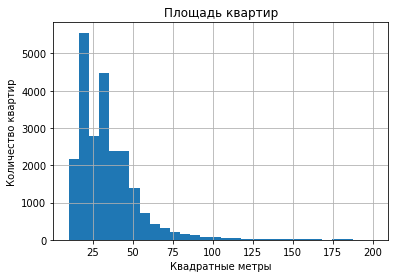

Наибольшие по площади варианты:
19540    409.700000
5358     409.000000
3117     360.288168
12401    347.500000
4237     332.000000
Name: living_area, dtype: float64
Наименьшие по площади варианты:
7268     10.080000
23481    10.080000
20714    10.277634
21854    10.300000
10475    10.300000
Name: living_area, dtype: float64


In [37]:
data['living_area'].hist(bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['living_area'].sort_values(ascending=False).head())
print('Наименьшие по площади варианты:')
print(data['living_area'].sort_values(ascending=True).head())

К жилым площадям относятся только спальни, детские и гостинные. Соответственно все остальное пространство типо санузлов, коридоров, кухонь и балконов не учитывается.
Больше всего от 10 до 49 метров жилой площади. Максимальные по количеству предложения находятся слева и справа от показателя 25 кв. м. Я думаю, что это связанно с тем, что больше всего люди продают жилья в диапазоне с 27 до 49 кв.м. 
После 50 кв. м. жилой площади наблюдается спад количества предложений на рынке. А после 100 кв. м. эти значения вообще ничтожно малые. Это говорит о том, что не так часто владельцы элитной недвижимости выставляют ее на продажу.

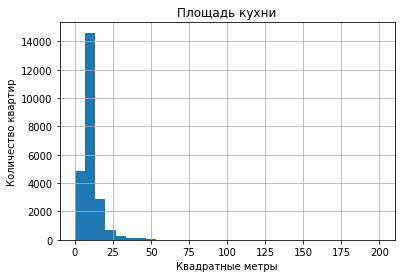

Наибольшие по площади варианты:
19540    112.0
20215    107.0
2489     100.7
Name: kitchen_area, dtype: float64
Наименьшие по площади варианты:
20217    1.3
16367    2.0
906      2.0
Name: kitchen_area, dtype: float64


In [38]:
data['kitchen_area'].hist(bins=30, range=(0,200))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(3))
print('Наименьшие по площади варианты:')
print(data['kitchen_area'].sort_values(ascending=True).head(3))

Самое большое количество предложений на рынке предлагает кухни в диапазоне до 25 м. 
Максимум предложений сосредоточен от 0 до 10 кв.м. С чем это может быть связано?
1. Наличие студий, апартаментов и квартир со свободной планировкой. Там не всегда можно корректно выявить где кухня, а где гостинная, особенно, если они смежные. 
2. Максимальное количество квартир продается общей площадью от 27 до 49 кв.м. Естественно, что кухня в таких квартирах будет занимать только часть от общей площади. И в квартире 49 кв.м. кухня вполне может занимать всего 8-9 кв.м.
3. Наличие больших кухонь, более 50 кв.м. скорее подходит элитному жилью, которого, как мы выяснили, очень мало на рынке недвижимости.

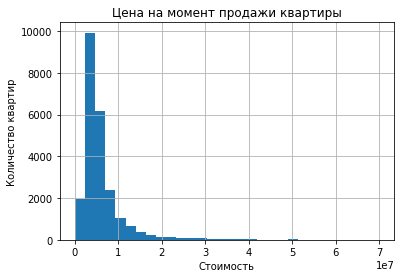

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
Name: last_price, dtype: int64
Наименьшие по цене варианты:
8793      12190
14911    430000
17456    430000
Name: last_price, dtype: int64


In [39]:
data['last_price'].hist(bins=30, range=(0,70000000))
plt.title('Цена на момент продажи квартиры')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(3))
print('Наименьшие по цене варианты:')
print(data['last_price'].sort_values(ascending=True).head(3))

Больше всего вариантов в диапазоне до 1 миллиона. 
Максимальная стоимость квартиры - 763 000 000. Скорее всего эти данные относятся к элитному жилью.

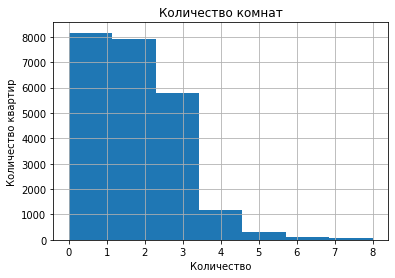

Больше всего комнат:
22649    7.0
16141    7.0
22420    7.0
Name: rooms, dtype: float64
Меньше всего комнат:
21306    0.0
19917    0.0
6408     0.0
Name: rooms, dtype: float64


In [40]:
data['rooms'].hist(bins=7, range=(0,8))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Больше всего комнат:')
print(data['rooms'].sort_values(ascending=False).head(3))
print('Меньше всего комнат:')
print(data['rooms'].sort_values(ascending=True).head(3))

Больше всего продают квартир от 0 до 2 комнат. 
В 0 квартир входят студии, квартиры со свободной планировкой и аппартаменты. 
Скорее всего это связано с низкой стоимостью студий и доступностью такого вида жилья по сравнению с остальными. 
Второе место занимают квартиры от 3 до 5 комнат. Их покупают уже реже.
А вот квартиры больше 5 комнат покупают осень очень редко. Это самые минимальные, по количеству, предложения на рынке.

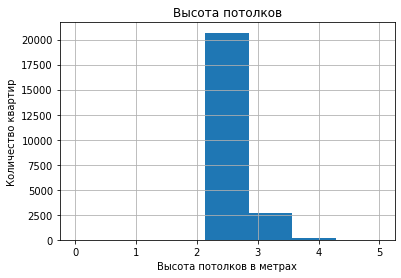

Самые высокие потолки:
21923    4.9
2802     4.8
19142    4.7
Name: ceiling_height, dtype: float64
Самые низкие потолки:
22590    1.0
5712     1.2
4212     2.0
Name: ceiling_height, dtype: float64


In [41]:
data['ceiling_height'].hist(bins=7, range=(0,5))
plt.title('Высота потолков')
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Самые высокие потолки:')
print(data['ceiling_height'].sort_values(ascending=False).head(3))
print('Самые низкие потолки:')
print(data['ceiling_height'].sort_values(ascending=True).head(3))

Больше всего квартир продается с потолками от 2 до 3 метров. Дальше идут квартиры с потолками от 3 до 4 метров. А квартиры с потолками до 2 метров и после 5 продаются на рынке реже всего.

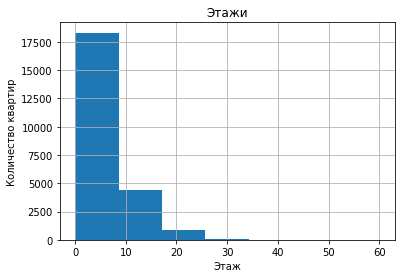

Самые высокие этажи:
16644    27
2629     27
6157     27
Name: floor, dtype: int64
Самые низкие этажи:
23698    1
2608     1
2609     1
Name: floor, dtype: int64


In [42]:
data['floor'].hist(bins=7, range=(0,60))
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Самые высокие этажи:')
print(data['floor'].sort_values(ascending=False).head(3))
print('Самые низкие этажи:')
print(data['floor'].sort_values(ascending=True).head(3))

Больше всего квартир продается с 1 по 9 этаж. А дальше значение постепенно идет на убыль.
Минимальный этаж, на котором продают квартиры -1, а максимальный - 33.

Сформируем график, который покажет медиану распределения цены по этажам по столбцу 'floor_type'.

<AxesSubplot:title={'center':'Распределение медианной цены по типам этажей'}, xlabel='floor_type'>

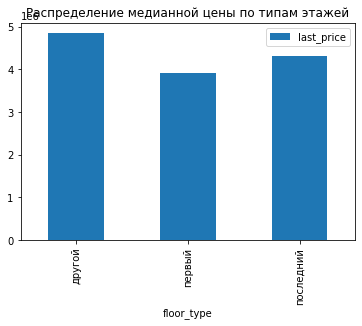

In [43]:
data_type_floor = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
data_type_floor.plot(kind='bar', title='Распределение медианной цены по типам этажей')

Дешевле всего продают квартиры, которые находятся на первом этаже. Чуть подороже продают квартиры, которые находятся на последнем этаже. Ну, а дороже всего продают квартиры со 2 до предпоследнего.


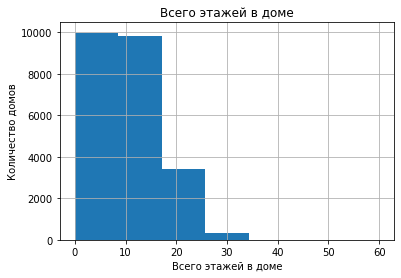

Дома, где больше всего этажей:
3797     29.0
7073     28.0
18183    28.0
Name: floors_total, dtype: float64
Дома, где меньше всего этажей:
22542    1.0
8335     1.0
17744    1.0
Name: floors_total, dtype: float64


In [44]:
data['floors_total'].hist(bins=7, range=(0,60))
plt.title('Всего этажей в доме')
plt.xlabel('Всего этажей в доме')
plt.ylabel('Количество домов')
plt.show()
print('Дома, где больше всего этажей:')
print(data['floors_total'].sort_values(ascending=False).head(3))
print('Дома, где меньше всего этажей:')
print(data['floors_total'].sort_values(ascending=True).head(3))

Чаще всего продают квартиры, где до 10 этажей. На втором месте находятся дома от 10 до 17 этажей, а на третьем от 17 до 25 этажей.
Дома, где больше 25 этажей намного реже мелькают в объявлениях о продаже дома.

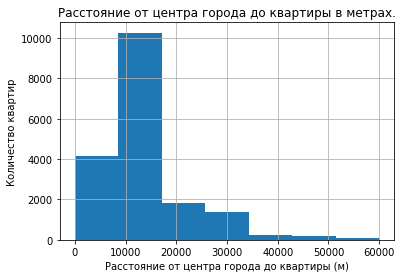

Самое далекое расстояние от центра:
9640    65968.0
5340    65952.0
577     65764.0
Name: cityCenters_nearest, dtype: float64
Самое близкое расстрояние к центру:
13694    181.0
1182     208.0
8614     215.0
Name: cityCenters_nearest, dtype: float64


In [45]:
data['cityCenters_nearest'].hist(bins=7, range=(0,60000))
plt.title('Расстояние от центра города до квартиры в метрах.')
plt.xlabel('Расстояние от центра города до квартиры (м)')
plt.ylabel('Количество квартир')
plt.show()
print('Самое далекое расстояние от центра:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(3))
print('Самое близкое расстрояние к центру:')
print(data['cityCenters_nearest'].sort_values(ascending=True).head(3))

Чаще всего продают квартиры, которые удалены от центра на 9-18 км. Их в выборке больше 10 000. На втором месте идет удаленность от 0 до 9 км. Ну а более далекие варианты встречаются еще реже.

Посмотрим на удаленность от аэропорта на графике.

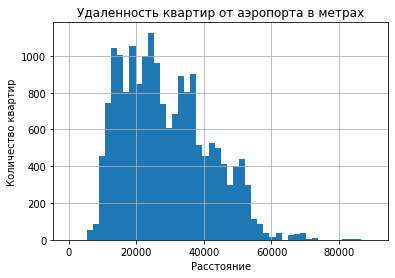

Самые удаленные варианты:
9640    84869.0
5340    84853.0
577     84665.0
Name: airports_nearest, dtype: float64
Самые близкие варианты:
21085       0.0
12899    6450.0
4017     6450.0
Name: airports_nearest, dtype: float64


In [46]:
data['airports_nearest'].hist(bins=50, range=(0,90000))
plt.title('Удаленность квартир от аэропорта в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

print('Самые удаленные варианты:')
print(data['airports_nearest'].sort_values(ascending=False).head(3))
print('Самые близкие варианты:')
print(data['airports_nearest'].sort_values(ascending=True).head(3))

Больше всего квартир продается, которые имеют удаленность от аэропорта в пределах 25 км. На 2 месте по частоте продажи, квартиры удаленностью 20 км от аэропорта. А на тратьем месте квартиры удаленностью 17 км от аэропорта. Здесь наблюдается зависимость. Чем удаленнее от аэропорта, тем меньше квартир продают.

Посмотрим наличие парков поблизости у продаваемых квартир.

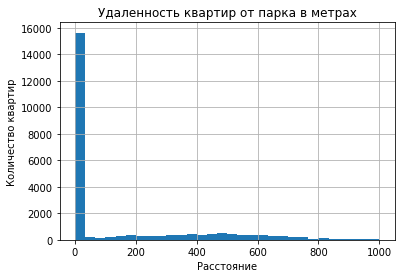

Самые удаленные варианты:
19430    3190.0
10959    3190.0
1590     3064.0
Name: parks_nearest, dtype: float64
Самые близкие варианты:
23698    0.0
11610    0.0
11612    0.0
Name: parks_nearest, dtype: float64


In [47]:
data['parks_nearest'].hist(bins=30, range=(0,1000))
plt.title('Удаленность квартир от парка в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

print('Самые удаленные варианты:')
print(data['parks_nearest'].sort_values(ascending=False).head(3))
print('Самые близкие варианты:')
print(data['parks_nearest'].sort_values(ascending=True).head(3))

Чаще всего продают квартиры, которые удалены от парков примерно на 500 метров. Квартиры, удаленные от парков на от 0 до 470 м продают также, как и квартиры удаленные от парков на 500-750 метров. Предложений квартир с удаленностьюот парка более, чем на 750 метров меньше всего.

##### 2.Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

Время продажи (медиана): 95 

Время продажи (среднее): 181 



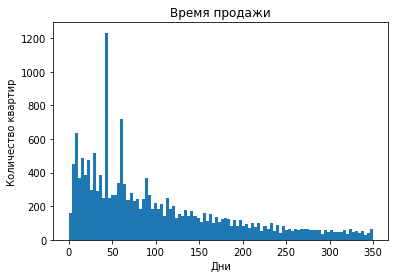

In [48]:
#рассчитаем время продажи и медиану
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,350))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

Среднее время продажи - 181 день. Медиана - 95 дней. То есть большинство продает свою квартиру в срок около 100 дней. Также есть несколько пиковых значений до и после 50 дней. В эти пики продалось больше 1000 и больше 600 квартир. Ну и после 100 дней график идет на спад, меньше 200 квартир продается в этот срок.

###### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучите, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

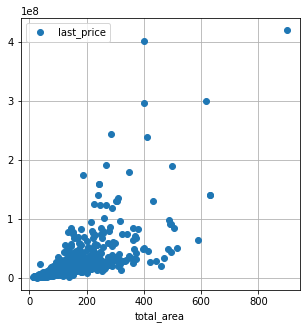

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.879814
total_area    0.879814    1.000000 



In [49]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Цена зависит от площади. Чем больше площадь, тем выше будет цена квартиры.

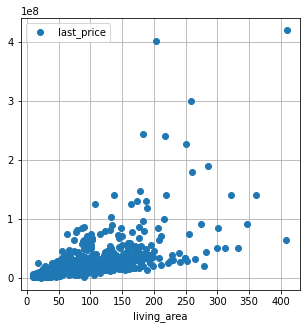

Корреляция цены и площади: 

             last_price  living_area
last_price     1.000000     0.579799
living_area    0.579799     1.000000 



In [50]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Цена также зависит не только от общей площади, но еще и от жилой площади. Чем она выше, тем больше цена квартиры.

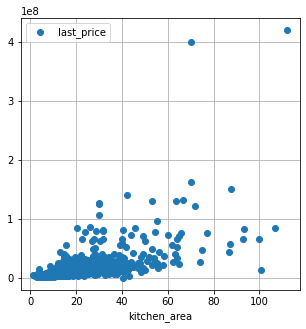

Корреляция цены и площади: 

              kitchen_area  last_price
kitchen_area      1.000000    0.617978
last_price        0.617978    1.000000 



In [51]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Зависимость существует также и от площади кухни. Чем она больше, тем выше стоимость жилья.

In [ ]:
Посмотрим на зависимость цены и количества комнат.

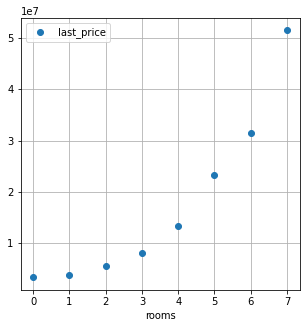

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.098262
rooms         0.098262  1.000000 



In [52]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и количества комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Наблюдается прямая зависимость стоимостьот количества комнат. Чем больше количество комнат, тем больше стоимость. Это логично,так как с увеличением комнат увеличивается и жилая площадь, площадь кухни и общая площадь. 

Посмотрим на зависимость цены над этажами.

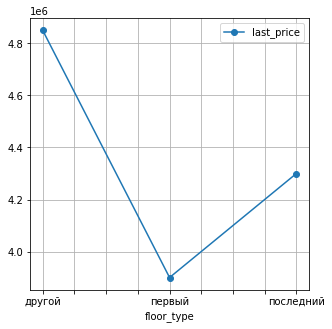

In [53]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Расположение тоже влияет на стоимость. Первый этаж стоит дешевле всех, последний чуть дороже, а остальные промежуточные варианты продаются дороже всего.

Посмотрим на расположение цены и даты публикации.

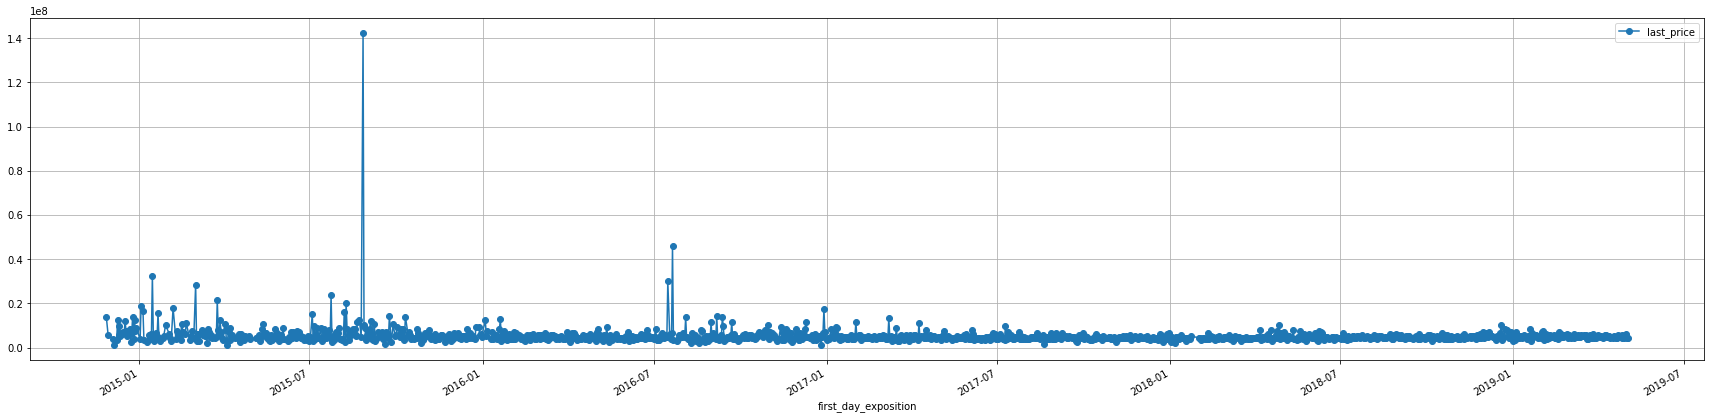

Корреляция цены и даты публикации: 

            last_price     rooms
last_price    1.000000  0.098262
rooms         0.098262  1.000000 



In [54]:
(
    data.pivot_table(index='first_day_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(30, 7))
)
plt.show()
print('Корреляция цены и даты публикации:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимости цены от даты публикации нет. Есть пиковое значение в августе 2015 года, когда квартиры продавались по рекордной цене. Но в основном цена не зависит от периода, когда выкладывалось объявление.

Изучим, зависит ли цена от дня недели.


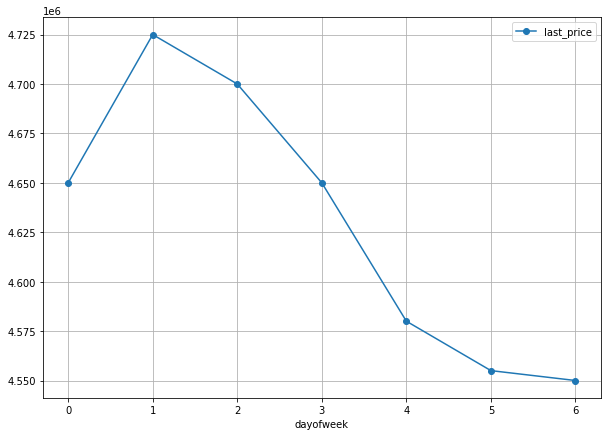

In [55]:
(
    data.pivot_table(index='dayofweek', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 7))
)
plt.show()


Дороже всего квартиры продают во вторник. А дешевле всего в воскресенье. Не знаю, с чем это связано. Может быть люди становятся более сговорчивыми на выходных?))))
Ну а вообще после вторника наблюдается спад цены вплоть до воскресенья. Так что зависимость есть.

Изучим зависит ли цена от месяца размещения.

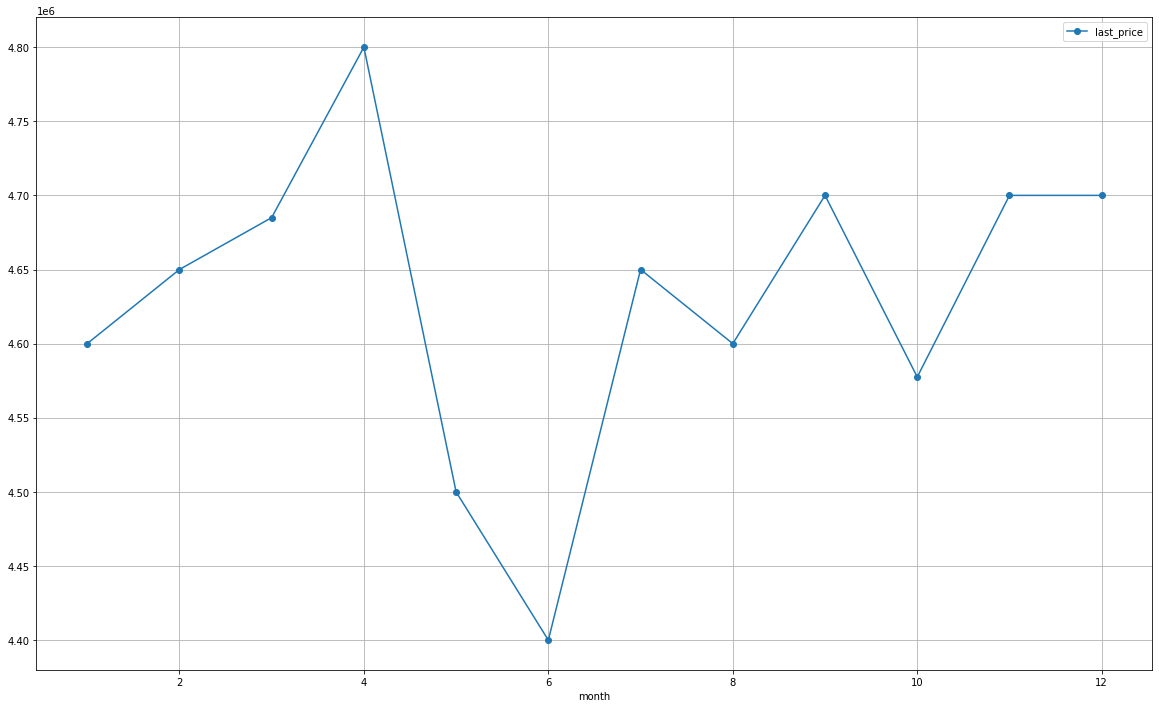

In [56]:
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(20, 12))
)
plt.show()

Самые высокие продажи наблюдаются в апреле, а самые низкие в июне. 
В целом график "пляшущий" и какой-либо сезонности я не наблюдаю.

Посмотрим на зависимость цены и года продажи.

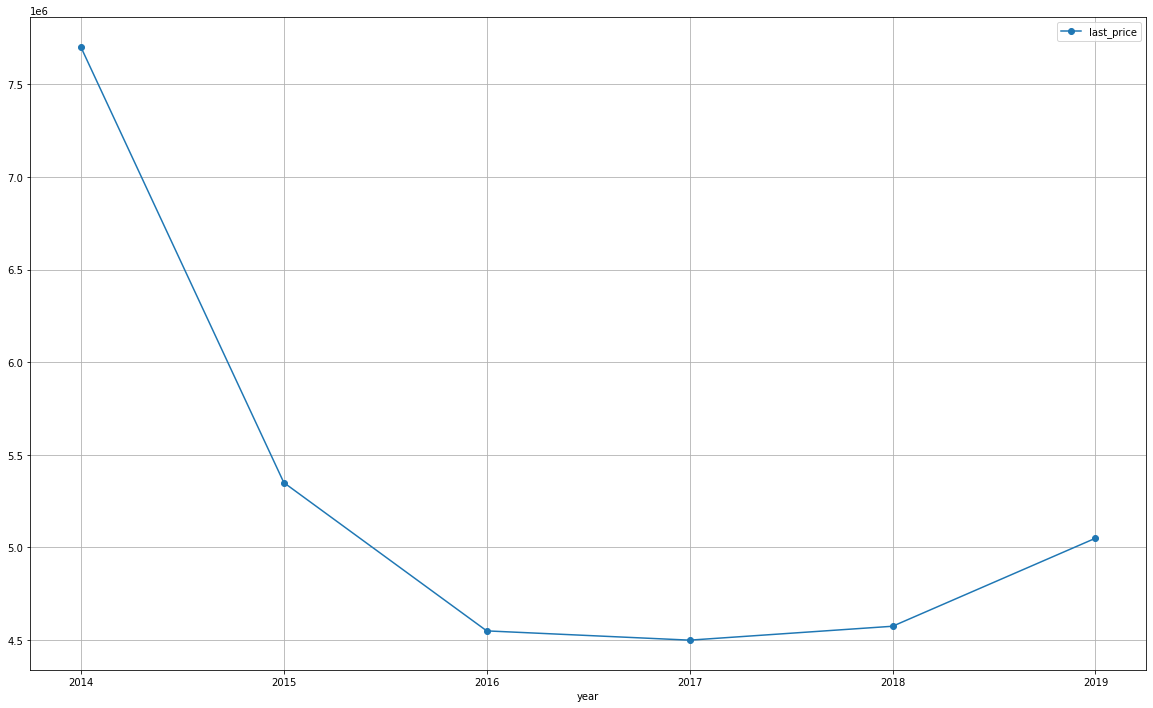

In [57]:
(
    data.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(20, 12))
)
plt.show()

Дороже всего недвижимость стоила в 2014 году. Возможно это связано с валютным кризисом, потому что дальше с 2015 по 2017 год шло падение стоимости недвижимости. А с 2018 года стоимость недвижимости стала медленно расти.

###### 4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Найдем населенные пункты, где самая высокая и самая низкая цена.

In [58]:
top_10 = data['locality_name'].value_counts().head(10)

In [59]:
city_sm_price = data.query('locality_name in (@top_10.index)').pivot_table(values='cost_1_sqmeter', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('cost_1_sqmeter', ascending=False)

,cost_1_sqmeter
locality_name,
санкт-петербург,212571
поселок парголово,196886
пушкин,190474
деревня кудрово,183833
поселок мурино,169985
поселок шушары,153696
всеволожск,132274
колпино,132162
гатчина,121911


Ожидаемо самая высокая цена в Санкт-Петербурге. Затем идет Пушкин, деревня Кудрово, поселок Парголово и другие населенные пункты. 

##### 5.Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

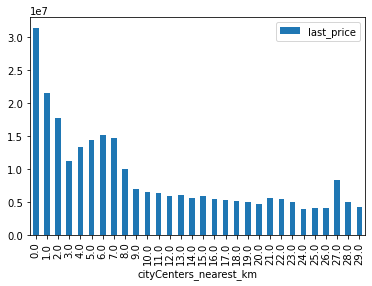

In [60]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)

Дороже всего стоит жилье в 1 километре. Затем, чем дальше от центра, стоимость жилья идет на убыль. Есть несколько пиковых значений на 6 и 27 километре. Возможно там продается элитное жилье или есть другие факторы влияющие на цену. Но в целом, чем ближе к центру, тем дороже.


# Общий вывод:

В ходе исследования я выявила, что на недвижимость в Питере влияют следующие факторы:
- площадь квартиры (сюда входит жилая площадь и площадь кухни);
- количество комнат (естественно, что студия будет дешевле, чем 3-х комнатная квартира);
- район, в котором находится квартира (центр Питера ожидаемо самый дорогой);
- этаж, где находится квартира (первые этажи - самые дешевые, последние чуть дороже, а остальные варианты самые дорогие)

Соответственно, чем ближе к центру, больше метраж и количество комнат, ну и скажем 5 этаж из 10, то это будет стоить дороже, чем студия на окраине города, на 1 этаже.

